# Tarea 5. Variational models for image processing

Guillermo Segura Gómez

## Exercice 1. Implementation of basic operators

Define functions :
- **forward−derivative−x** which implements the forward partial derivative with respect to x of a color image.
- **forward−derivative−y** which implements the forward partial derivative with respect to y of a color image.
- **backward−derivative−x** which implements the backward partial derivative with respect to x of a color image.
- **backward−derivative−y** which implements the backward partial derivative with respect to y of a color image.

Tip : Use matrix operations instead of convolutions with kernels to implement these methods.
It makes their executions faster.

From these operators define :
- a function gradient which constructs the gradient of a color image using forward derivatives.
- a function divergence which constructs the divergence operator using backward derivatives.

---

Podemos considerar una imagen como una función bidimensional f(x, y), donde $x$ y $y$ son las coordenadas espaciales de cada píxel, y el valor de f en cualquier punto (x, y) da la intensidad del píxel en esa ubicación. Cuando trabajamos con imágenes en color, esta función es vectorial, ya que tenemos tres valores de intensidad en cada punto en el caso de RGB, uno para cada canal de color: rojo, verde y azul, por lo que tendríamos una función $f(\mathbb{R}^2) \rightarrow  \mathbb{R}^3$ 

La **derivada parcial hacia adelante** mide el cambio en intensidad al moverse de un píxel a su vecino inmediato en la dirección que se especifica.

La derivada parcial hacia adelante de una función $f(x, y)$ con respecto a $x$ se define como:

$$ f_x^+(x, y) = \lim_{\Delta x \to 0} \frac{f(x + \Delta x, y) - f(x, y)}{\Delta x} $$

En una imagen digital no podemos tener límites infinitesimales, por lo que esta derivada se aproxima como la diferencia entre los valores de los píxeles adyacentes, lo que nos da:

$$ f_x^+(x, y) \approx f(x + 1, y) - f(x, y) $$

Similarmente, la derivada parcial hacia adelante con respecto a $y$ se define como:

$$ f_y^+(x, y) \approx f(x, y + 1) - f(x, y) $$

La **derivada parcial hacia atrás** mide el cambio en intensidad al moverse en la dirección opuesta, es decir, del píxel actual al anterior.

La derivada parcial hacia atrás se define de manera similar, pero en lugar de mirar hacia el pixel siguiente, miramos hacia el anterior. Para $x$, se define como:

$$ f_x^-(x, y) = \lim_{\Delta x \to 0} \frac{f(x, y) - f(x - \Delta x, y)}{\Delta x} $$

De la misma forma, para una imagen, esto se convierte en:

$$ f_x^-(x, y) \approx f(x, y) - f(x - 1, y) $$

Y para $y$, la derivada hacia atrás es:

$$ f_y^-(x, y) \approx f(x, y) - f(x, y - 1) $$

Podemos programar estas funciones de manera sencilla utilizando python. Como se reviso al principio de la discusión de este ejercicio, las imágenes pueden ser vistas como funciones de dos dimensiones. En este caso sería una matriz de $n \times n$ y cada elemento tendría tres elementos a su vez ya que es una imagen a color. Utilizamos la escritura de las matrices de *numpy* para poder desplazar las matrices y hacer las operaciones de las funciones.

In [85]:
import numpy as np

def forward_derivative_x(image):
    # Añadir cero al final en la dirección x para mantener las dimensiones originales
    padded_image = np.pad(image, ((0, 0), (0, 1), (0, 0)), mode='edge')
    # Calcular la derivada hacia adelante en x
    derivative = padded_image[:, 1:, :] - padded_image[:, :-1, :]
    return derivative

def forward_derivative_y(image):
    # Añadir cero al final en la dirección y para mantener las dimensiones originales
    padded_image = np.pad(image, ((0, 1), (0, 0), (0, 0)), mode='edge')
    # Calcular la derivada hacia adelante en y
    derivative = padded_image[1:, :, :] - padded_image[:-1, :, :]
    return derivative

def backward_derivative_x(image):
    # Añadir cero al inicio en la dirección x para mantener las dimensiones originales
    padded_image = np.pad(image, ((0, 0), (1, 0), (0, 0)), mode='edge')
    # Calcular la derivada hacia atrás en x
    derivative = padded_image[:, 1:, :] - padded_image[:, :-1, :]
    return derivative

def backward_derivative_y(image):
    # Añadir cero al inicio en la dirección y para mantener las dimensiones originales
    padded_image = np.pad(image, ((1, 0), (0, 0), (0, 0)), mode='edge')
    # Calcular la derivada hacia atrás en y
    derivative = padded_image[1:, :, :] - padded_image[:-1, :, :]
    return derivative


Ahora probamos las funciones de derivación en alguna imagen.

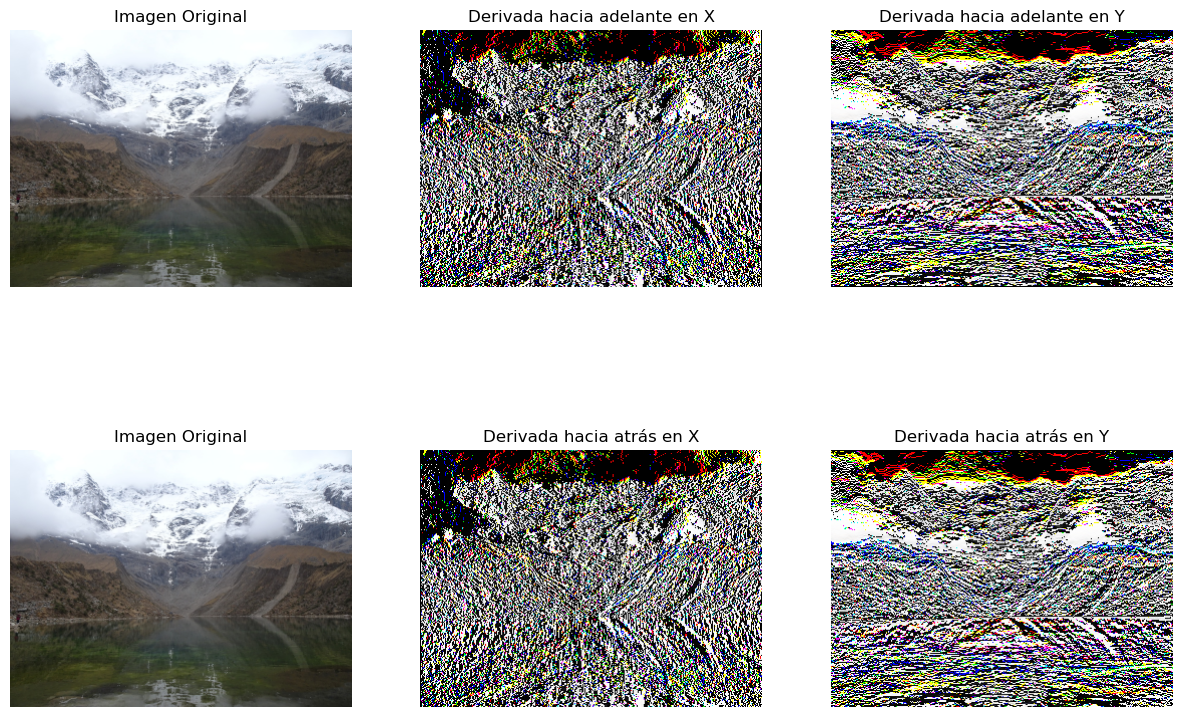

In [86]:
import matplotlib.pyplot as plt
import glob
import cv2

# Path de la imagen
img_path = glob.glob('/Users/guillermo_sego/Desktop/Segundo Semestre/CVision/Tarea 5/img2.png')[0]

# Lee la imagen en color
image_bgr = cv2.imread(img_path, cv2.IMREAD_COLOR)
# Convierte la imagen a RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Aplicar las funciones de derivadas a la imagen RGB
fdx = forward_derivative_x(image_rgb)
fdy = forward_derivative_y(image_rgb)
bdx = backward_derivative_x(image_rgb)
bdy = backward_derivative_y(image_rgb)

# Imprimir resultados
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes[0, 0].imshow(image_rgb)
axes[0, 0].set_title('Imagen Original')
axes[0, 0].axis('off')

axes[0, 1].imshow(np.abs(fdx).astype(np.uint8))
axes[0, 1].set_title('Derivada hacia adelante en X')
axes[0, 1].axis('off')

axes[0, 2].imshow(np.abs(fdy).astype(np.uint8))
axes[0, 2].set_title('Derivada hacia adelante en Y')
axes[0, 2].axis('off')

axes[1, 0].imshow(image_rgb)
axes[1, 0].set_title('Imagen Original')
axes[1, 0].axis('off')

axes[1, 1].imshow(np.abs(bdx).astype(np.uint8))
axes[1, 1].set_title('Derivada hacia atrás en X')
axes[1, 1].axis('off')

axes[1, 2].imshow(np.abs(bdy).astype(np.uint8))
axes[1, 2].set_title('Derivada hacia atrás en Y')
axes[1, 2].axis('off')

plt.show()

Ahora, definimos las funciones gradiente y divergencia en función de las derivadas que construimos. 

El **gradiente** se define como:

$$ \nabla f = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right) $$

Donde $\frac{\partial f}{\partial x}$ y $\frac{\partial f}{\partial y}$ son las derivadas parciales de $f$ con respecto a $x$ e $y$, respectivamente. 

En una imagen a color, que tiene múltiples canales, el gradiente se puede calcular por separado para cada canal, resultando en un vector gradiente para cada punto en cada canal. Se puede utilizar para encontrar bordes y otras discontinuidades en la imagen (cambios bruscos en la intensidad).

La **divergencia** en un punto da una medida de cuánto un campo vectorial se está "expandiendo" desde ese punto, y se define como la suma de las derivadas parciales de las componentes del vector con respecto a sus dimensiones correspondientes. Para un campo vectorial $\mathbf{v} = (v_x, v_y)$, la divergencia se define como:

$$ \text{div}(\mathbf{v}) = \nabla \cdot \mathbf{v} = \frac{\partial v_x}{\partial x} + \frac{\partial v_y}{\partial y} $$

En el caso del campo de gradientes de una imagen, esto significaría tomar el gradiente de los gradientes. Esencialmente, se esta mirando cómo cambian los gradientes en la imagen, lo que puede indicar áreas donde los cambios en la intensidad aumentan o disminuyen rápidamente.


In [87]:
def gradient(image):
    # Calcula las derivadas hacia adelante en x e y
    grad_x = forward_derivative_x(image)
    grad_y = forward_derivative_y(image)
    
    # Combina las derivadas para formar el vector gradiente
    gradient = np.stack((grad_x, grad_y), axis=-1)
    
    return gradient


def divergence(gradient):
    # Extrae los componentes del gradiente en x e y
    grad_x = gradient[..., 0]  # Todos los componentes x del gradiente
    grad_y = gradient[..., 1]  # Todos los componentes y del gradiente
    
    # Calcula las derivadas hacia atrás en x e y para cada componente del gradiente
    div_x = backward_derivative_x(grad_x)
    div_y = backward_derivative_y(grad_y)
    
    # La divergencia es la suma de estas dos derivadas
    div = div_x + div_y
    
    return div

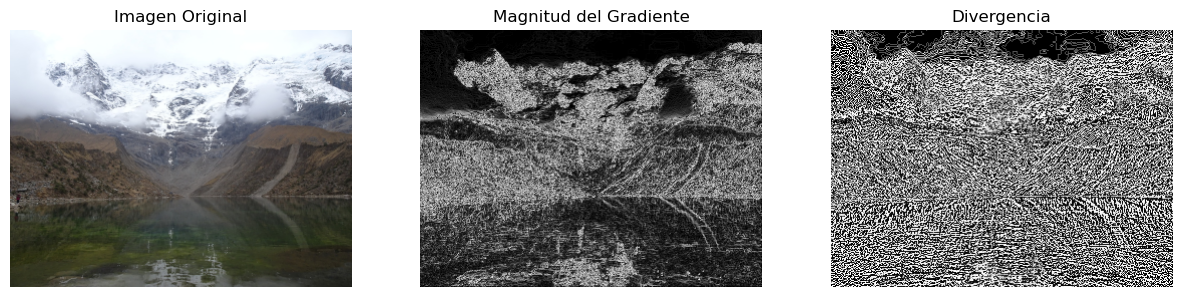

In [108]:
# Calcula el gradiente de la imagen
img_gradient = gradient(image_rgb)

# Calcula la divergencia del gradiente
img_divergence = divergence(img_gradient)

# Imprimir resultados
plt.figure(figsize=(15, 10))

# Imagen original
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Imagen Original')
plt.axis('off')

# Magnitud del gradiente
gradient_magnitude = np.sqrt(np.sum(img_gradient**2, axis=-1))
plt.subplot(1, 3, 2)
plt.imshow(np.mean(gradient_magnitude, axis=-1), cmap='gray')
plt.title('Magnitud del Gradiente')
plt.axis('off')

# Divergencia
plt.subplot(1, 3, 3)
plt.imshow(np.mean(img_divergence, axis=-1), cmap='gray')
plt.title('Divergencia')
plt.axis('off')

plt.show()

## Exercice 2 (Joint denoising and deblurring)

**img1−degradation1.png** is the result of applying Gaussian blur of standard deviation 2
and additive white Gaussian noise of standard deviation 5 to **img1.png**.

1. Implement the Algorithm 3 seen in class by using the operators constructed in Exercise

2. Use **fast−gaussian−convolution** to implement the component-wise convolution with a Gaussian kernel.

3. Apply the algorithm to **img1−degradation1.png** with the following parameters : $\eta$ = 0.0001, $\epsilon$ = 0 001, $\alpha$ = 0.01, $K$ = 15000. You will test different values of the regularization parameter $\gamma$ and select the one providing the best PSNR with respect to **img1.png**.

---

### Eliminación del ruido

Revisando las notas de la clase, en el apartado de restauración de imágenes podemos trabajar con la eliminación de ruido y desenfoque. Es común trabajar con imágenes que poseen "ruido" y "desenfoque". El ruido puede deberse a la calidad de la cámara, las condiciones de iluminación, etc., mientras que el desenfoque puede ocurrir por movimiento o enfoque incorrecto durante la captura de la imagen. Nuestro objetivo es "limpiar" estas imágenes para recuperar la imagen original $\underline{u}$ tanto como sea posible, eliminando el ruido y corrigiendo el desenfoque. Esto se conoce como **denoising** eliminación de ruido y **deblurring** eliminación de desenfoque.

Para poder plantear esto, comenzamos con un modelo simple que describe cómo se ve afectada la imagen original $\underline{u}$ por el ruido $n$, dando como resultado la imagen degradada que observamos $u_0$. En el caso más simple de **solo denoising**, nuestro modelo de degradación se simplifica a la siguiente relación:
$$ u_0 = \underline{u} + n, $$
lo que significa que el operador de degradación $A$ es simplemente la identidad, y la imagen observada $u_0$ es la suma de la imagen original sin ruido $\underline{u}$ y el ruido $n$. En otras palabras, el ruido se suma simplemente a nuestra imagen original.

Para "limpiar" la imagen, utilizamos modelos matemáticos que nos ayudan a encontrar la versión más probable de la imagen original sin ruido. Estos modelos tratan de encontrar una imagen $u$ que sea lo más cercana posible a $u_0$ (en términos de fidelidad a los datos) pero que también sea suave (para eliminar el ruido). Esto se logra mediante un balance, controlado por un parámetro $\lambda$, entre hacer que $u$ se parezca a $u_0$ y mantener $u$ suave. Tenemos dos variantes de estos modelos, diferenciándose en cómo definen la "suavidad" de la imagen.

El primero se describe como la solución al problema de minimización:

$$ 
\underset{u}{\arg \min } \frac{1}{2} \int_{\Omega}\left\|u(x) - u_0(x)\right\|^2 + \lambda \|\nabla u(x)\|^2 \, dx, 
$$

donde el término $\frac{1}{2} \int_{\Omega}\left\|u(x) - u_0(x)\right\|^2 \, dx$ mide la fidelidad de la imagen restaurada $u$ con respecto a la imagen observada $u_0$, y $\lambda \|\nabla u(x)\|^2$ es un término de regularización que favorece soluciones suaves, con $\lambda$ controlando el balance entre ambos.

El segundo modelo introduce un término de regularización ligeramente diferente y se define como:

$$ 
\underset{u}{\arg \min } \frac{1}{2} \int_{\Omega}\left\|u(x) - u_0(x)\right\|^2 + \lambda \sqrt{\eta + \|\nabla u(x)\|^2} \, dx, 
$$

donde $\eta$ es un parámetro pequeño que asegura que la expresión bajo la raíz cuadrada nunca sea cero, evitando singularidades en la derivada.

Para encontrar la imagen $u$ que minimiza nuestras funciones objetivo (energías), calculamos el "gradiente de energía", que nos dice en qué dirección cambiar $u$ para hacerla más similar a la imagen original mientras reducimos el ruido. Luego aplicamos un método de minimización como el descenso de gradiente para ajustar $u$ paso a paso hasta que encontramos la mejor solución.

El gradiente de la energía $E(u)$ para el primer modelo se da por:
$$ \nabla E(u) = u - u_0 - \lambda \Delta u, $$
donde $\Delta u$ es el laplaciano de $u$, representando la suma de las segundas derivadas parciales, que indica la dispersión de $u$.

Para el segundo modelo, el gradiente de $E_\eta(u)$ es:
$$ \nabla E_\eta(u) = u - u_0 - \lambda \operatorname{div}\left(\frac{\nabla u}{\sqrt{\eta + \|\nabla u\|^2}}\right), $$
donde $\operatorname{div}$ es el operador de divergencia, que en este contexto, toma el gradiente de $u$ y lo normaliza, dándonos una dirección en la que actualizar $u$ para minimizar $E_\eta(u)$.

### Eliminación de ruido y desenfoque

Cuando también queremos corregir el desenfoque, nuestro modelo de degradación se vuelve más complejo, incluyendo un operador $A$ que representa cómo la imagen se desenfoca (a menudo mediante una convolución con un "kernel" o filtro específico). Nuestro objetivo sigue siendo el mismo: encontrar la mejor $u$, pero esta vez también necesitamos deshacer el efecto del desenfoque representado por $A$. Entonces, nuestro modelo de degradación toma la forma:

$$ 
u_0 = A \underline{u} + n, 
$$

donde $A$ es un operador que representa una convolución con algún núcleo específico. Basándonos en los resultados de la eliminación de ruido, preferimos el siguiente modelo variacional para nuestros experimentos:

$$ 
E_\eta(u) = \frac{1}{2} \int_{\Omega}\left\|A u(x) - u_0(x)\right\|^2 + \lambda \sqrt{\eta + \|\nabla u(x)\|^2} \, dx, 
$$

y el gradiente de esta energía en $u$ es:
$$ 
\nabla E_\eta(u) = A^T\left(A u - u_0\right) - \lambda \operatorname{div}\left(\frac{\nabla u}{\sqrt{\eta + \|\nabla u\|^2}}\right), 
$$
donde $A^T$ es el operador adjunto de $A$. Esto nos permite aplicar un algoritmo de descenso por gradiente (algoritmo 3) para encontrar numéricamente la solución del modelo variacional, es decir, restaurar la imagen $u$ minimizando $E_\eta(u)$.

**Algorithm 3 Joined Deblurring + denoising: Model 2**

Initialization: Take $u^{(0)}=u_0$, and choose $\epsilon>0$ the stopping criteria, $\alpha>0$ the step
size, and $K$ the maximum number of iterations.

*while* $\sqrt{\operatorname{MSE}\left(u^{(k+1)}, u^{(k)}\right)}>\epsilon$ and $k<K$ 
    
*do*
    
$u^{(k+1)}=u^{(k)}-\alpha\left(A^*\left(A u^{(k)}-u_0\right)-\lambda \operatorname{div}\left(\frac{\nabla u^{(k)}}{\sqrt{\eta+\left\|\nabla u^{(k)}\right\|^2}}\right)\right)$

*end while*

Para este caso consideramos el modelo
$$ 
u_0 = A \underline{u} + n, 
$$

donde $A = G^*$ es un blur gaussiano de varianza $\sigma_b$ y $n$ un ruido blanco gaussiano de varianza $\sigma_n$.

El objetivo de este ejercicio consiste en implementar el algoritmo 3 para eliminación de ruido y desenfoque. Lo primero, definimos la función A que vamos a utilizar. Se nos proporciona la convolución rápida gaussiana en la función adjunta al ejercicio.

Es importante destacar que para el caso de $A = G_{\sigma^*}$ la convolución $A = A^*$ es simétrica respecto a su adjunta, por lo que solo necesitamos la siguiente función para implementar el algoritmo.

In [89]:
from scipy import signal

def fast_gaussian_convolution(u, sigma):
    # Crear el kernel gaussiano
    gaussian_kernel_1d_1 = np.expand_dims(signal.gaussian(u.shape[0], sigma), axis=1)
    gaussian_kernel_1d_2 = np.expand_dims(signal.gaussian(u.shape[1], sigma), axis=1)
    gaussian_kernel_2d = np.matmul(gaussian_kernel_1d_1, np.transpose(gaussian_kernel_1d_2))
    gaussian_kernel_2d /= np.sum(gaussian_kernel_2d)  # Normalizar el kernel

    # Verificar si la imagen es en escala de grises o en color
    if u.ndim == 3:  # Imagen en color
        result = np.zeros_like(u)
        for i in range(3):  # Aplicar la convolución a cada canal
            result[:, :, i] = np.real(np.fft.fftshift(np.fft.ifft2(np.fft.fft2(u[:, :, i]) * np.fft.fft2(gaussian_kernel_2d))))
    else:  # Imagen en escala de grises
        result = np.real(np.fft.fftshift(np.fft.ifft2(np.fft.fft2(u) * np.fft.fft2(gaussian_kernel_2d))))

    return result

In [124]:
    """
    Algoritmo para deblurring y denoising combinados.

    :param fast_gaussian_convolution: Función para la convolución gaussiana rápida.
    :param div: Operador de divergencia.
    :param grad: Función para calcular el gradiente de la imagen.
    :param u0: Imagen degradada inicial.
    :param lambdak: Parámetro de regularización.
    :param eta: Parámetro pequeño para evitar división por cero.
    :param alpha: Tamaño de paso para el descenso por gradiente.
    :param epsilon: Criterio de parada basado en MSE.
    :param nMax: Número máximo de iteraciones.
    :param sigma: Desviación estándar para el kernel gaussiano.
    """

In [130]:
from tqdm import tqdm  # Asegúrate de haber instalado tqdm

def DeblurringDenoising(fast_gaussian_convolution, div, grad, u0, lambdak, eta, alpha, epsilon, nMax, sigma):
    # Inicialización
    uk = np.array(u0)
    sequence = [uk]

    # Utilizar tqdm para la barra de progreso en el bucle for
    for k in tqdm(range(nMax), desc="Deblurring and Denoising"):
        # El resto del código permanece igual...
        
        # Aplicar A y A^* usando fast_gaussian_convolution
        Au_k = fast_gaussian_convolution(uk, sigma)
        Astar_diff = fast_gaussian_convolution(Au_k - u0, sigma)

        deno = eta + np.linalg.norm(grad(uk), axis=-1)**2

        # Añadir una dimensión extra a 'deno' para hacerla compatible con la forma de 'grad(uk)'
        deno_expanded = np.expand_dims(deno, axis=-1)  # Añade una nueva dimensión al final

        # Realizar la división usando broadcasting
        aux = grad(uk) / deno_expanded

        # Calcular el gradiente de la energía en uk
        gk = Astar_diff - lambdak * div(aux)

        # Actualizar uk para la siguiente iteración
        uk_next = uk - alpha * gk
        sequence.append(uk_next)

        # Calcular MSE entre iteraciones sucesivas para el criterio de parada
        mse = np.mean((uk_next - uk)**2)

        print(f"Iteración {k+1}, MSE: {mse:.5f}", end='\r')

        # Verificar la condición de parada
        if np.sqrt(mse) < epsilon:
            print(f"Convergence reached at iteration {k+1}")
            break
        
        uk = uk_next  # Preparar para la siguiente iteración

    return uk, k + 1, np.sqrt(mse) < epsilon, sequence


Probamos la función para la imagen **img1_degradation.png**

In [131]:
# Define los parámetros del algoritmo
eta = 0.0001
epsilon = 0.001
alpha = 0.01
nMax = 15000
lambdak_values = [0.1]  # Diferentes valores de lambdak (λ) para probar
sigma = 0.1

# Imagen
u_path = glob.glob('/Users/guillermo_sego/Desktop/Segundo Semestre/CVision/Tarea 5/img1_degradation1.png')[0]

# Lee la imagen en color
u_bgr = cv2.imread(img_path, cv2.IMREAD_COLOR)
# Convierte la imagen a RGB
u_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Función para calcular el PSNR
def calculate_psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    MAX_PIXEL_VALUE = 255.0
    return 20 * np.log10(MAX_PIXEL_VALUE / np.sqrt(mse))

# Aplicación del algoritmo para cada valor de lambdak y cálculo de PSNR
for lambdak in lambdak_values:
    restored_img, k, converged, sequence = DeblurringDenoising(
        fast_gaussian_convolution, divergence, gradient, u_rgb, lambdak, eta, alpha, epsilon, nMax, sigma
    )
    psnr = calculate_psnr(u_rgb, restored_img)
    print(f"λ={lambdak}, PSNR: {psnr:.2f}")

Deblurring and Denoising:   0%|          | 0/15000 [00:00<?, ?it/s]/var/folders/9t/s_zg1kn954l26k1btcnp7lfm0000gn/T/ipykernel_19193/2053258905.py:5: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gaussian_kernel_1d_1 = np.expand_dims(signal.gaussian(u.shape[0], sigma), axis=1)
/var/folders/9t/s_zg1kn954l26k1btcnp7lfm0000gn/T/ipykernel_19193/2053258905.py:6: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gaussian_kernel_1d_2 = np.expand_dims(signal.gaussian(u.shape[1], sigma), axis=1)
Deblurring and Denoising: 100%|██████████| 15000/15000 [11:35<00:00, 21.57it/s]

λ=0.1, PSNR: -1240.96
